In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
df=pd.read_csv('news_articles.csv')

In [21]:
df.head()

,Text
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...


In [22]:
df.isnull().sum()

,0
Text,0


In [23]:
df.shape

(2225, 1)

In [24]:
df.iloc[0]

,0
Text,Budget to set scene for election\n \n Gordon B...


In [25]:
df.loc[0,'Text']

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [26]:
df.duplicated().sum()

np.int64(98)

In [27]:
df=df.drop_duplicates().reset_index(drop=True)

In [28]:
df.shape

(2127, 1)

helper package  for enhancing filetransfer with hugging  face hub

In [29]:
!pip install hf_xet

In [30]:
from sentence_transformers import SentenceTransformer

In [31]:
import torch

In [32]:
model=SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [34]:
embedding_matrix=model.encode(df['Text'],show_progress_bar=True,device=device)

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [35]:
embedding_matrix.shape

(2127, 384)

In [36]:
# defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text1,text2):
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 norm of the embedding vector
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)

    # computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1,embeddings2))/(norm1*norm2))

    return cosine_similarity_score


In [37]:
a= "i love apple"
b= "apple is a fruit"
c= "i like this table"
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))


0.55750245
0.07198238
0.27396193


In [38]:
# We can also use prebuilt method to calculate similarity score

a= "i love apple"
b= "apple is a fruit"
c= "i like this table"

from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))


tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


In [39]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return df.loc[list(top_k_indices), 'Text']


In [40]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [41]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

In [42]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1, n_init=10)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 1794.6540762744944
Number of Clusters: 3 	Average Distortion: 1721.3794034741272
Number of Clusters: 4 	Average Distortion: 1666.665920555233
Number of Clusters: 5 	Average Distortion: 1621.4808968638959
Number of Clusters: 6 	Average Distortion: 1591.4609586281913
Number of Clusters: 7 	Average Distortion: 1568.4620717495284
Number of Clusters: 8 	Average Distortion: 1547.6723073928868
Number of Clusters: 9 	Average Distortion: 1533.6770983546244
Number of Clusters: 10 	Average Distortion: 1522.4184690414752


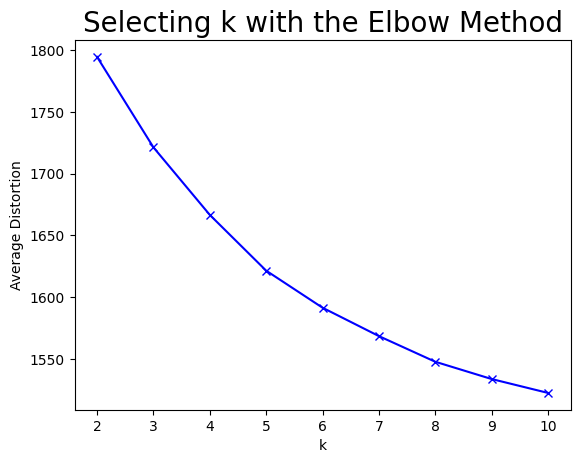

For n_clusters = 2, the silhouette score is 0.046811509877443314)
For n_clusters = 3, the silhouette score is 0.04964283108711243)
For n_clusters = 4, the silhouette score is 0.06065066531300545)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802200734615326)
For n_clusters = 8, the silhouette score is 0.05344569683074951)
For n_clusters = 9, the silhouette score is 0.05067500099539757)
For n_clusters = 10, the silhouette score is 0.04589764401316643)


In [43]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()
sil_score = []
cluster_list = range(2, 11)

from sklearn.metrics import silhouette_score

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

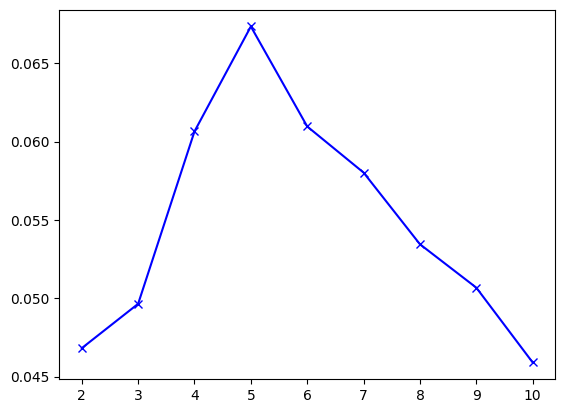

In [44]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()


In [45]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
Kmeans=KMeans(n_clusters=n_categories,random_state=1).fit(embedding_matrix)


In [46]:
# creating a copy of the data
clustered_data = df.copy()

# assigning the cluster/category labels
clustered_data['Category'] = Kmeans.labels_

clustered_data.head()

,Text,Category
0,Budget to set scene for election\n \n Gordon B...,1
1,Army chiefs in regiments decision\n \n Militar...,1
2,Howard denies split over ID cards\n \n Michael...,1
3,Observers to monitor UK election\n \n Minister...,1
4,Kilroy names election seat target\n \n Ex-chat...,1


In [47]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")


CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

In [48]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")


CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

In [49]:
# loading the actual labels
labels = pd.read_csv("news_article_labels.csv")
# checking the unique labels
labels['Label'].unique()


array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [50]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values


In [51]:
from sklearn.metrics import classification_report
# Create a mapping from cluster labels to actual category names
cluster_to_category = clustered_data.groupby('Category')['Actual Category'].agg(lambda x: x.mode()[0]).to_dict()

# Map the predicted cluster labels to the actual category names
predicted_categories = clustered_data['Category'].map(cluster_to_category)

# Print the classification report
print(classification_report(clustered_data['Actual Category'], predicted_categories))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



In [52]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape


(2127, 3)

In [53]:
incorrect_category_data.head()

,Text,Category,Actual Category
0,Budget to set scene for election\n \n Gordon B...,1,Politics
1,Army chiefs in regiments decision\n \n Militar...,1,Politics
2,Howard denies split over ID cards\n \n Michael...,1,Politics
3,Observers to monitor UK election\n \n Minister...,1,Politics
4,Kilroy names election seat target\n \n Ex-chat...,1,Politics


In [54]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), Kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), Kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545187652210279
Distance from Predicted Category
1.0357046825280756


In [55]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), Kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), Kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.019115605584521
Distance from Predicted Category
1.0080196953598326
